In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,mean_absolute_error
from pandas.plotting import scatter_matrix
from matplotlib.colors import ListedColormap
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection

In [3]:
data=pd.read_csv('C:/Users/spidinil/Desktop/wine.csv',sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.shape

(1599, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


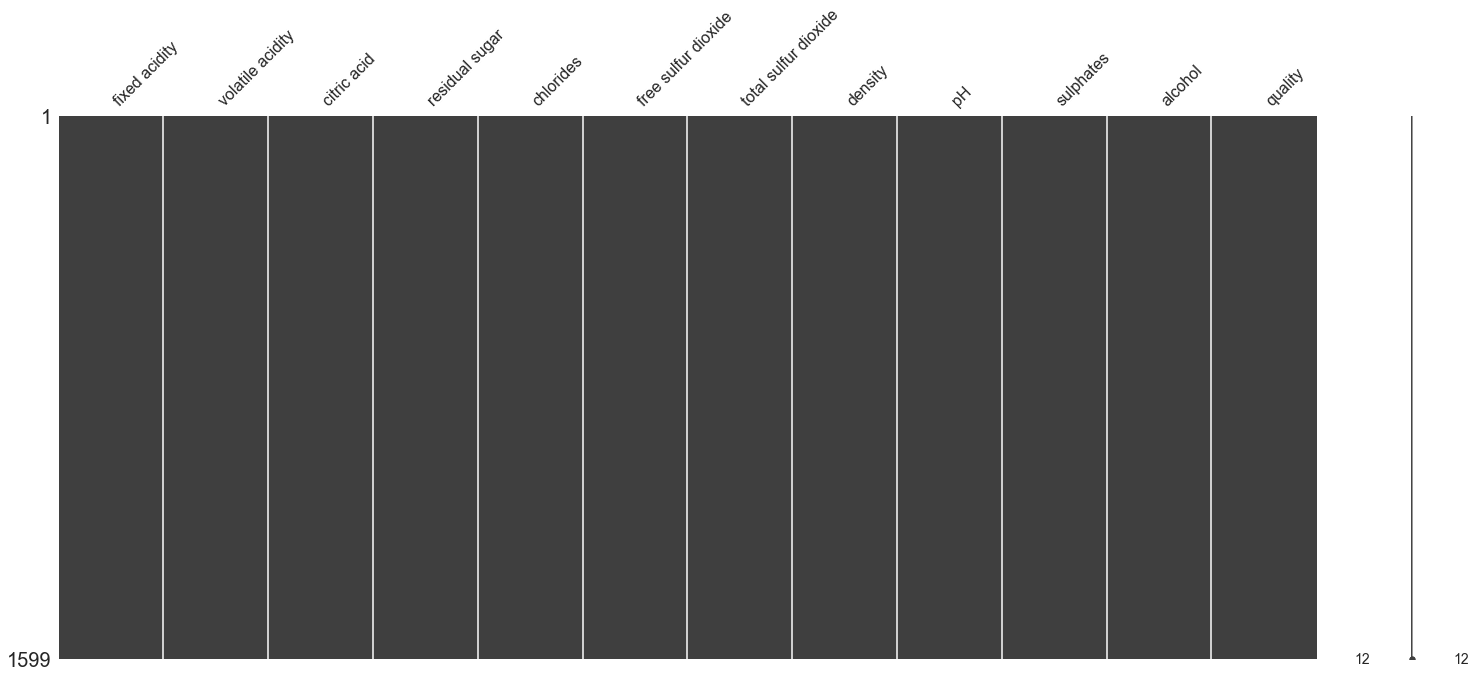

In [7]:
import missingno as mn
mn.matrix(data)

In [8]:
pivot=data.pivot_table(data.columns,['quality'],aggfunc='median')
pivot

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,
3,9.925,0.0905,0.035,0.997565,7.50,6.0,3.39,2.1,0.545,15.0,0.845
4,10.000,0.0800,0.090,0.996500,7.50,11.0,3.37,2.1,0.560,26.0,0.670
5,9.700,0.0810,0.230,0.997000,7.80,15.0,3.30,2.2,0.580,47.0,0.580
6,10.500,0.0780,0.260,0.996560,7.90,14.0,3.32,2.2,0.640,35.0,0.490
7,11.500,0.0730,0.400,0.995770,8.80,11.0,3.28,2.3,0.740,27.0,0.370
8,12.150,0.0705,0.420,0.994940,8.25,7.5,3.23,2.1,0.740,21.5,0.370


In [9]:
corr=data.corr()['quality'].sort_values(ascending=False)
corr

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

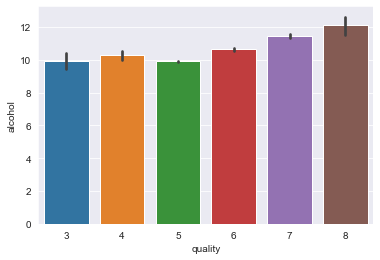

In [10]:
sns.barplot(x='quality',y='alcohol',data=data)
plt.show()

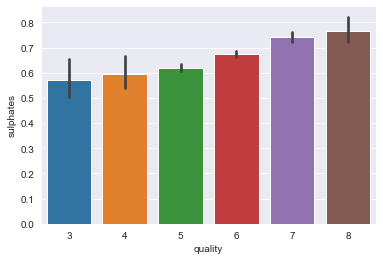

In [11]:
sns.barplot(x='quality',y='sulphates',data=data)
plt.show()

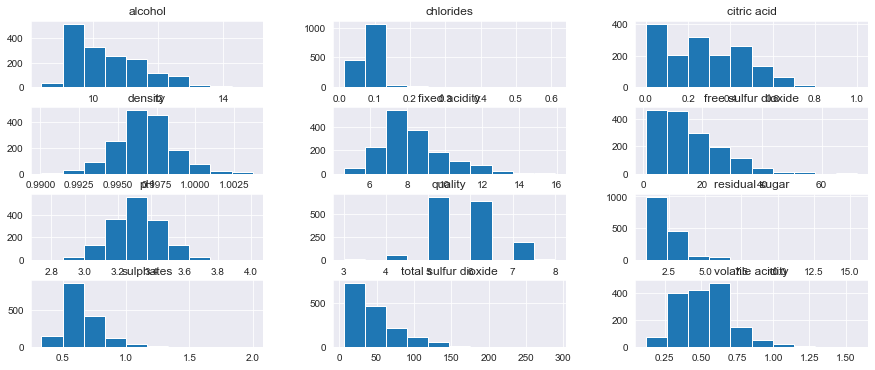

In [12]:
data.hist(bins=10,figsize=(15,6))
plt.show()

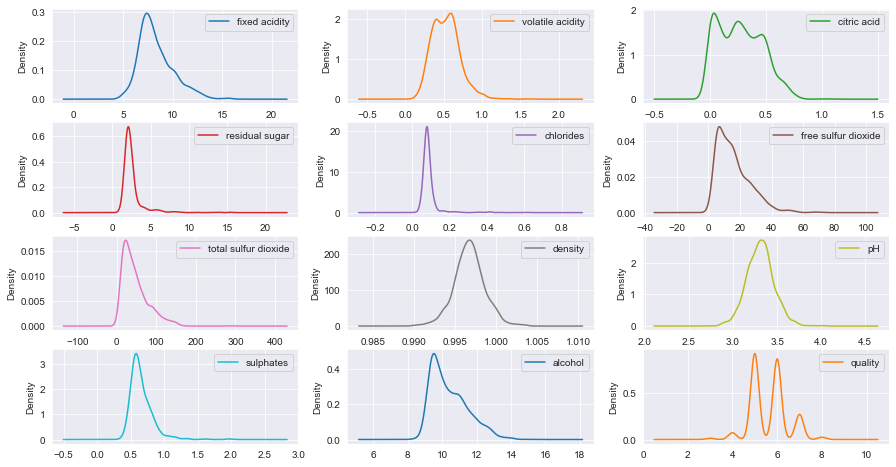

In [13]:
data.plot(kind='density',subplots=True,layout=(4,3),sharex=False,figsize=(15,8))
plt.show()

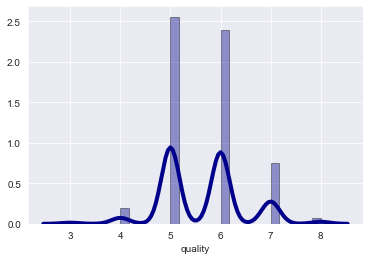

In [14]:
sns.distplot(data['quality'],hist=True,kde=True,
            bins='auto',color='darkblue',
            hist_kws={'edgecolor':'black'},
            kde_kws={'linewidth':4})
plt.show()

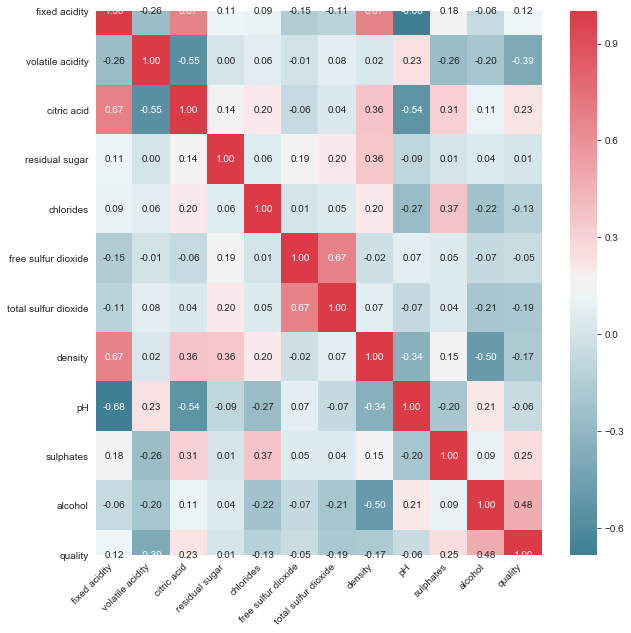

In [15]:
corr=data.corr()
fig,ax=plt.subplots(figsize=(10,10))
cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,cmap=cmap,annot=True,fmt='.2f');
ax.set_xticklabels(data.columns,rotation=45,horizontalalignment='right');
ax.set_xticklabels(data.columns)
plt.show()

In [16]:
#renaming quality of wine with good and bad
bins=(2,6,8)
names=['bad','good']
data['quality']=pd.cut(data['quality'],bins=bins,labels=names)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [17]:
data['quality']=np.where(data['quality']=='good',1,0)#1 for good and 0 for bad

In [18]:
data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [19]:
X=data.drop('quality',axis=1)
y=data.quality

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50)

In [21]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [22]:
from warnings import simplefilter
simplefilter(action='ignore',category=FutureWarning)

In [23]:
seed = 7
# prepare models
models = []
models.append(('SupportVectorClassifier', SVC()))
models.append(('StochasticGradientDecentC', SGDClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('GaussianNB', GaussianNB()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('AdaBoostClassifier', AdaBoostClassifier()))
models.append(('LogisticRegression', LogisticRegression()))

In [24]:
results=[]
names=[]
cv_scores=[]
scoring='accuracy'
for name,model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=seed)
    cv_results=model_selection.cross_val_score(model,X_train,y_train,cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg='%s: %f (%f)' % (name,cv_results.mean(),cv_results.std())
    print(msg)

SupportVectorClassifier: 0.873364 (0.024056)
StochasticGradientDecentC: 0.818559 (0.034185)
RandomForestClassifier: 0.896832 (0.022766)
DecisionTreeClassifier: 0.845983 (0.035255)
GaussianNB: 0.826446 (0.025753)
KNeighborsClassifier: 0.860845 (0.026717)
AdaBoostClassifier: 0.866351 (0.039970)
LogisticRegression: 0.871014 (0.028362)


In [25]:
svc=SVC()
svc.fit(X_train,y_train)
pred_svc=svc.predict(X_test)

In [26]:
def svc_param_select(X,y,nfolds):
    param={
        'C':[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
        'kernel':['linear','rbf'],
        'gamma':[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    }
    grid_search=GridSearchCV(svc,param_grid=param,scoring='accuracy',cv=nfolds)
    grid_search.fit(X,y)
    return grid_search.best_params_

In [27]:
svc_param_select(X_train,y_train,10)

{'C': 1.3, 'gamma': 1.3, 'kernel': 'rbf'}

In [28]:
svc2=SVC()
svc2.fit(X_train,y_train)
pred_svc2=svc2.predict(X_test)
print('Confusion Matrix:',confusion_matrix(y_test,pred_svc2))
print('Classification_report',classification_report(y_test,pred_svc2))
print('Accuracy_score',accuracy_score(y_test,pred_svc2))

Confusion Matrix: [[282   5]
 [ 20  13]]
Classification_report               precision    recall  f1-score   support

           0       0.93      0.98      0.96       287
           1       0.72      0.39      0.51        33

    accuracy                           0.92       320
   macro avg       0.83      0.69      0.73       320
weighted avg       0.91      0.92      0.91       320

Accuracy_score 0.921875


In [29]:
sgd=SGDClassifier(loss='hinge',penalty='l2',max_iter=60)
sgd.fit(X_train,y_train)
pred_sgd=sgd.predict(X_test)

In [30]:
rfc=RandomForestClassifier(n_estimators=200,max_depth=20,random_state=0)
rfc.fit(X_train,y_train)
pred_rfc=rfc.predict(X_test)

In [31]:
n_neighbors=2
for weights in ['uniform','distance']:
    KNC=KNeighborsClassifier(n_neighbors=n_neighbors,weights=weights)
    KNC.fit(X_train,y_train)
    pred_KNC=KNC.predict(X_test)
    print('KNC',weights)
    print(classification_report(y_test,pred_KNC))

KNC uniform
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       287
           1       0.56      0.42      0.48        33

    accuracy                           0.91       320
   macro avg       0.75      0.69      0.72       320
weighted avg       0.90      0.91      0.90       320

KNC distance
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       287
           1       0.51      0.70      0.59        33

    accuracy                           0.90       320
   macro avg       0.74      0.81      0.77       320
weighted avg       0.92      0.90      0.91       320



In [32]:
adc=AdaBoostClassifier(n_estimators=100)
adc.fit(X_train,y_train)
pred_adc=adc.predict(X_test)

In [33]:
def evaluate(model,test_features,test_labels):
    predictions=model.predict(test_features)
    print('Model Performance')
    print('Mean Absolute Error: {:0.4f}'.format(mean_absolute_error(test_labels,predictions)))
    print('Accuracy Score {:0.2f}'.format(accuracy_score(test_labels,predictions)*100))

In [34]:
evaluate(svc,X_test,y_test)
evaluate(svc2,X_test,y_test)
evaluate(rfc,X_test,y_test)
evaluate(KNC,X_test,y_test)
evaluate(adc,X_test,y_test)

Model Performance
Mean Absolute Error: 0.0781
Accuracy Score 92.19
Model Performance
Mean Absolute Error: 0.0781
Accuracy Score 92.19
Model Performance
Mean Absolute Error: 0.0625
Accuracy Score 93.75
Model Performance
Mean Absolute Error: 0.1000
Accuracy Score 90.00
Model Performance
Mean Absolute Error: 0.0781
Accuracy Score 92.19


In [35]:
scores=cross_val_score(rfc,X_test,y_test,cv=5)
scores.mean()

0.9219574175824177

In [36]:
importance=rfc.feature_importances_
std=np.std([ensemble.feature_importances_ for ensemble in rfc.estimators_],axis=0)
std

array([0.03098495, 0.04115874, 0.03169765, 0.02403076, 0.02920207,
       0.02700259, 0.02667613, 0.0446304 , 0.02393212, 0.03480949,
       0.05494527])

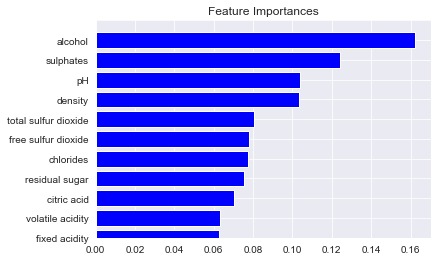

In [37]:
indices=np.argsort(importance)
plt.figure()
plt.title('Feature Importances')
plt.barh(range(X.shape[1]),importance[indices],color='b',align='center')
plt.yticks(range(X.shape[1]),data.columns)
plt.ylim([0,X.shape[1]])
plt.show()